#  Exploring Factors That Impact Median Listing Prices for Homes In USA:
### An Analysis On The Trade-Off Between Affordable Living & Quality of Living 

## Introduction:

Home values are based on many factors such as walk scores, access to public transportation, the quality of life in the area, and economic factors such as unemployment rates. This analysis explores how these factors may increase or decrease the value of a house across the United States of America. 



In [111]:
# importing packages 
import pandas as pd
import numpy as np 
import matplotlib as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image

### Analyzing Parameters On A National Level:

Parameters Include:
1. Walk Scores Per State
2. Transit Scores Per State
3. Obesity Rates in Adult Males and Females Per State
4. Unemployment Rates Per State
5. Happiness Index Per State
6. Median Listing-Prices For Homes Per State 


In [2]:
# loading dataset
scores_df = pd.read_csv("scores_states.csv")
#scores_df.head()

In [100]:
# pre-processing walk and transit score dataframe
print(scores_df.dtypes)

CITY             object
STATE            object
WALK_SCORE        int64
TRANSIT_SCORE     int64
BIKE_SCORE        int64
POPULATION        int64
dtype: object


In [4]:
scores_df.replace('-- ', np.nan, inplace=True)
scores_df.replace('--', np.nan, inplace=True)

In [5]:
scores_df.dropna(inplace=True)

In [6]:
scores_df['POPULATION']=scores_df['POPULATION'].str.replace(',','')

In [7]:
scores_df["WALK_SCORE"] = scores_df["WALK_SCORE"].astype(int)
scores_df["BIKE_SCORE"] = scores_df["WALK_SCORE"].astype(int)
scores_df["TRANSIT_SCORE"] = scores_df["TRANSIT_SCORE"].astype(float).astype(int)
scores_df["POPULATION"] = scores_df["POPULATION"].astype(float).astype(int)

In [99]:
print(scores_df.dtypes)

CITY             object
STATE            object
WALK_SCORE        int64
TRANSIT_SCORE     int64
BIKE_SCORE        int64
POPULATION        int64
dtype: object


In [62]:
scores_df = scores_df.sort_values(by=["STATE"],ascending=True)
scores_df.head()

,CITY,STATE,WALK_SCORE,TRANSIT_SCORE,BIKE_SCORE,POPULATION
63,Anchorage,AK,30,21,30,291826
103,Montgomery,AL,25,16,25,205764
97,Birmingham,AL,33,21,33,212237
87,Glendale,AZ,40,33,40,226721
92,Scottsdale,AZ,31,23,31,217385


## Walk and Transit Scores Across States in USA:

Below is a graph highlighting the range of walk scores across different states taking population into consideration. As we can see, New York has one of the highest walk scores in the nation, followed by other states such as California. NYC is known internationally as a tourist hub and emphasizes public transportation. Furthermore, since NY has densely packed cities such as Brooklyn, NYC, and Queens. All of these cities, emphasize the usage of public transport and walking as a means of transportation. 

In [107]:
walkscore_state_fig = px.scatter(scores_df,title = "Walk Scores Across States in The United States of America", x = "STATE", y = "POPULATION",color = "WALK_SCORE", size = "WALK_SCORE")
walkscore_state_fig.update_xaxes(tickmode='linear')

walkscore_state_fig.show()

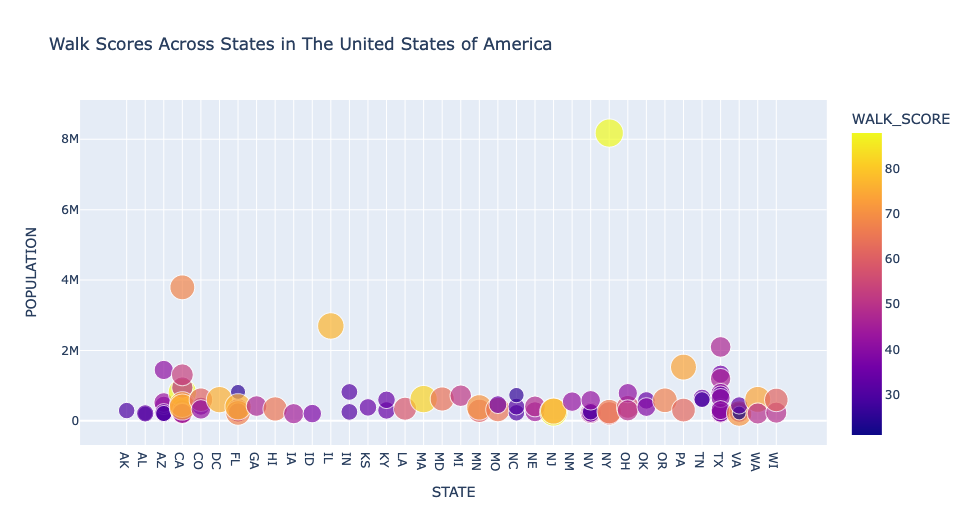

In [64]:
transit_fig = px.scatter(scores_df,title = "Transit Scores Across States in The United States of America", x = "STATE", y = "POPULATION",color = "TRANSIT_SCORE", size = "TRANSIT_SCORE")
transit_fig.update_xaxes(tickmode='linear')

transit_fig.show()

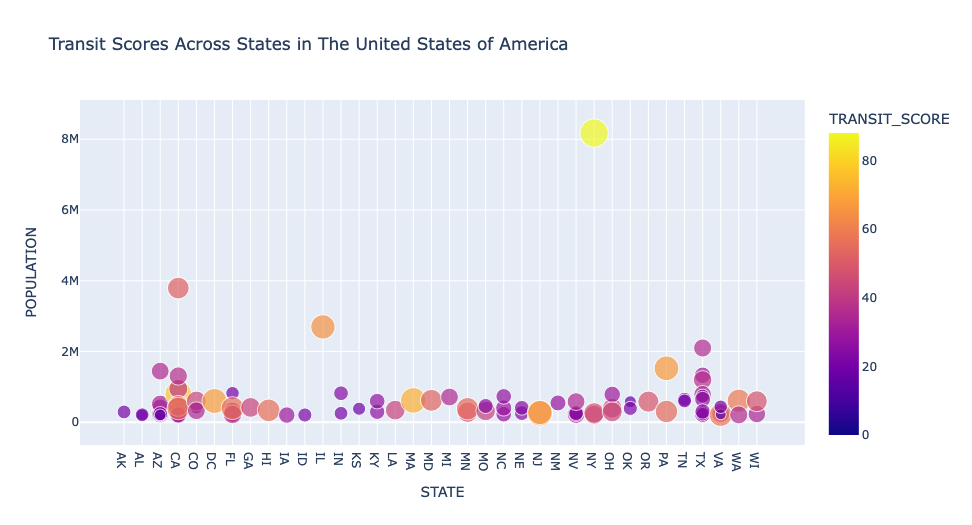

## Analyzing Obesity Rates in Adult Males and Females Per State:

A study done by researchers at the University of Washing School of Public Health discovered a strong association between home values and obesity among women in Seattle and its suburbs. Using this study, obesity rates in both adult male and females were used as a parameter to check if this correlation was seen on a national level. 

[Link To Study](https://sph.washington.edu/news-events/news/female-obesity-linked-property-values)

In [23]:
obesity_rates = pd.read_csv("obesity_rates.csv")

In [98]:
print(obesity_rates.dtypes)

State                       object
County                      object
Male_Obesity                 int64
Female_Obesity               int64
Male_Physical_Activity       int64
Female_Physical_Activity     int64
dtype: object


In [97]:
print(obesity_rates.isnull().sum())

State                       0
County                      0
Male_Obesity                0
Female_Obesity              0
Male_Physical_Activity      0
Female_Physical_Activity    0
dtype: int64


In [26]:
obesity_rates = obesity_rates.dropna()

In [96]:
print(obesity_rates.isnull().sum())

State                       0
County                      0
Male_Obesity                0
Female_Obesity              0
Male_Physical_Activity      0
Female_Physical_Activity    0
dtype: int64


In [28]:
obesity_rates["Male_Obesity"] = obesity_rates["Male_Obesity"].astype(int)
obesity_rates["Male_Physical_Activity"] = obesity_rates["Male_Physical_Activity"].astype(int)
obesity_rates["Female_Obesity"] = obesity_rates["Female_Obesity"].astype(int)
obesity_rates["Female_Physical_Activity"] = obesity_rates["Female_Physical_Activity"].astype(int)

In [95]:
print(obesity_rates.dtypes)

State                       object
County                      object
Male_Obesity                 int64
Female_Obesity               int64
Male_Physical_Activity       int64
Female_Physical_Activity     int64
dtype: object


In [30]:
obesity_rates.head()

,State,County,Male_Obesity,Female_Obesity,Male_Physical_Activity,Female_Physical_Activity
2,Alabama,Autauga,37,38,52,47
3,Alabama,Baldwin,33,33,54,49
4,Alabama,Barbour,41,51,44,35
5,Alabama,Bibb,40,45,42,37
6,Alabama,Blount,38,41,43,37


In [31]:
state_obesity_rates = px.scatter(obesity_rates, title = "Male Obesity Rates By State In The United States of America", x = "State", y = "Male_Obesity",color = "Male_Physical_Activity")
state_obesity_rates.update_xaxes(tickmode='linear')

state_obesity_rates.show()

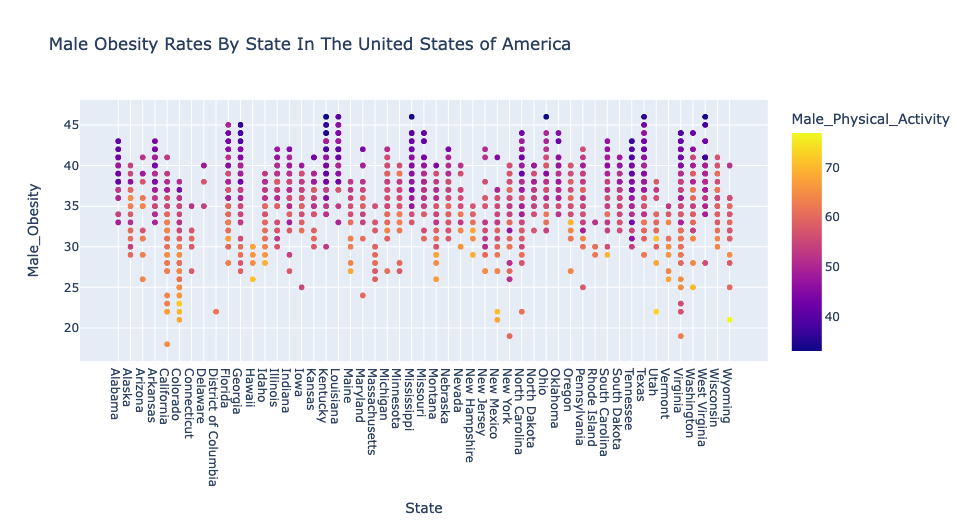

In [32]:
state_obesity_rates_female = px.scatter(obesity_rates, title = "Female Obesity Rates By State In The United States of America", x = "State", y = "Female_Obesity",color = "Female_Physical_Activity")
state_obesity_rates_female.update_xaxes(tickmode='linear')

state_obesity_rates_female.show()

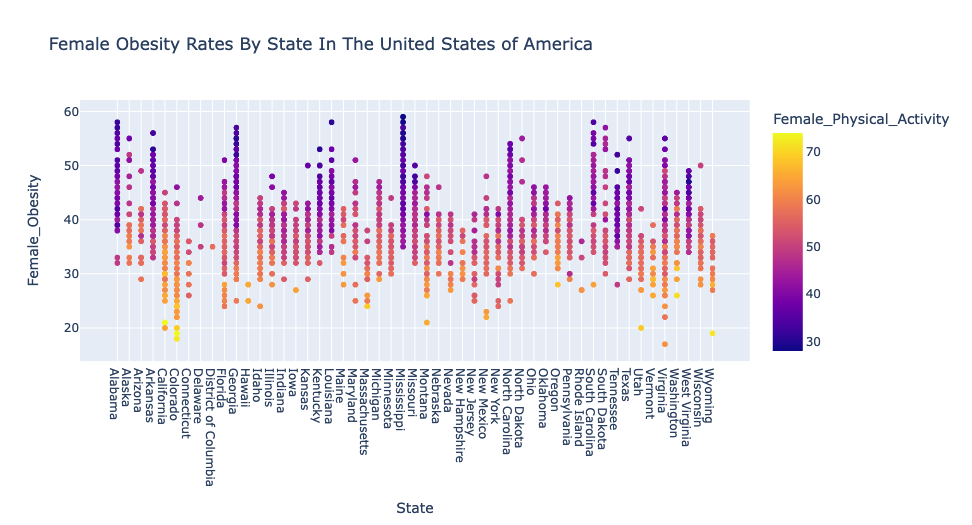

## Exploring Unemployment Rates Across The States:

A significant factor that highlights the economy of a state and nation is the unemployment rate. Many studies have shown that a higher unemployment rate is associated with lower housing prices, hence it is used as a parameter in this study to analyze the correlation between the two.  

In [40]:
unemployment = pd.read_csv("unemployement.csv")

In [41]:
unemployment.head()

,State,Sep-12,Oct-12,Nov-12,Dec-12,Jan-13,Feb-13,Mar-13,Apr-13,May-13,...,Dec-21,Jan-22,Feb-22,Mar-22,Apr-22,May-22,Jun-22,Jul-22,Aug-22,Sep-22
0,Alabama,7.9,7.8,7.8,7.7,7.6,7.6,7.5,7.4,7.3,...,3.1,3.1,3.0,2.9,2.8,2.7,2.6,2.6,2.6,2.6
1,Alaska,7.1,7.1,7.1,7.1,7.1,7.0,7.0,7.0,7.0,...,5.5,5.6,5.3,4.9,4.8,4.6,4.6,4.5,4.6,4.4
2,Arizona,8.1,8.1,8.1,8.1,8.1,8.1,8.0,8.0,7.9,...,3.9,3.7,3.6,3.3,3.2,3.2,3.3,3.3,3.5,3.7
3,Arkansas,7.2,7.2,7.2,7.2,7.2,7.2,7.2,7.2,7.2,...,3.3,3.2,3.1,3.1,3.2,3.2,3.2,3.3,3.4,3.5
4,California,10.2,10.0,9.9,9.8,9.7,9.5,9.4,9.3,9.2,...,5.8,5.7,5.3,4.8,4.6,4.3,4.2,3.9,4.1,3.9


In [42]:
unemployment = unemployment[["State","Sep-20"]]

In [43]:
unemployment = unemployment.rename(columns = {"Sep-20":"Rate"})

In [44]:
unemployment.head()

,State,Rate
0,Alabama,6.1
1,Alaska,7.7
2,Arizona,7.2
3,Arkansas,5.8
4,California,10.3


In [91]:
print(unemployment.isnull().sum())

State        0
Rate         0
StateCode    1
dtype: int64


In [90]:
print(unemployment.dtypes)

State        object
Rate          int64
StateCode    object
dtype: object


In [47]:
unemployment["Rate"] = unemployment["Rate"].astype(int)

In [48]:
unemployment.head()

,State,Rate
0,Alabama,6
1,Alaska,7
2,Arizona,7
3,Arkansas,5
4,California,10


In [49]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [50]:
unemployment['StateCode'] = unemployment['State'].map(code)

In [51]:
fig = px.choropleth(unemployment,
                    locations='StateCode',
                    color='Rate',
                    color_continuous_scale='sunsetdark',
                    hover_name='State',
                    locationmode='USA-states',
                    scope='usa')

fig.add_scattergeo(
    locations=unemployment['StateCode'],
    locationmode='USA-states',
    text=unemployment['StateCode'],
    mode='text')

fig.update_layout(
    title={'text':'Unemployment Rate by State In America',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
fig.show()

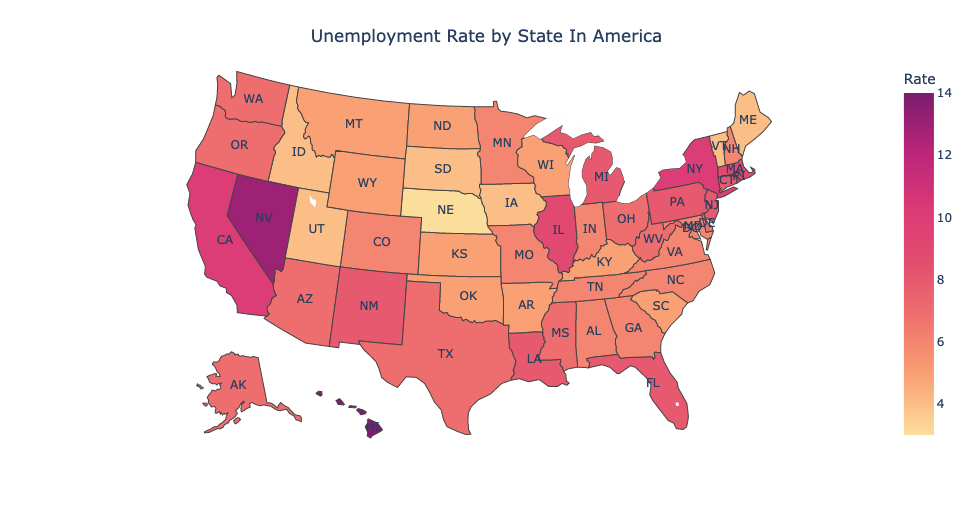

## Analysis on Happiness Index Across The States:

Quality of life is an important parameter before settling on buying a house. Quality of life is dependent on many parameter such work environment, communities, and the environment. The Happiness Index is a comprehensive survey instrument that assesses happiness, wellbeing, and aspects of sustainability and resilience. It is an important system that is used to correlate other life factors. In this analysis, the happiness index was analyzed across states to determine any correlation between a high total score on the index and any affect it has on the median homevalue prices in the nation. 

In [52]:
happiness_index = pd.read_csv("hapiness.csv")

In [54]:
happiness_index = happiness_index.sort_values(by=["State"],ascending=True)
happiness_index.head()

,State,totalScore,emotAndPhysRank,workEnvironRank,communityAndEnvironRank
44,Alabama,39.35,46,35,43
46,Alaska,38.21,33,49,50
20,Arizona,52.92,27,47,34
48,Arkansas,36.61,50,46,23
4,California,63.14,4,50,12


In [89]:
print(happiness_index.dtypes)

State                      object
totalScore                  int64
emotAndPhysRank             int64
workEnvironRank             int64
communityAndEnvironRank     int64
dtype: object


In [56]:
happiness_index["totalScore"] = happiness_index["totalScore"].astype(int)

In [88]:
print(happiness_index.isnull().sum())

State                      0
totalScore                 0
emotAndPhysRank            0
workEnvironRank            0
communityAndEnvironRank    0
dtype: int64


In [58]:
happiness_index_fig = px.bar(happiness_index,title = "Happiness Index By States in The United States of America", x = "State", 
                             y = "totalScore", hover_data = happiness_index.columns)

happiness_index_fig.show()

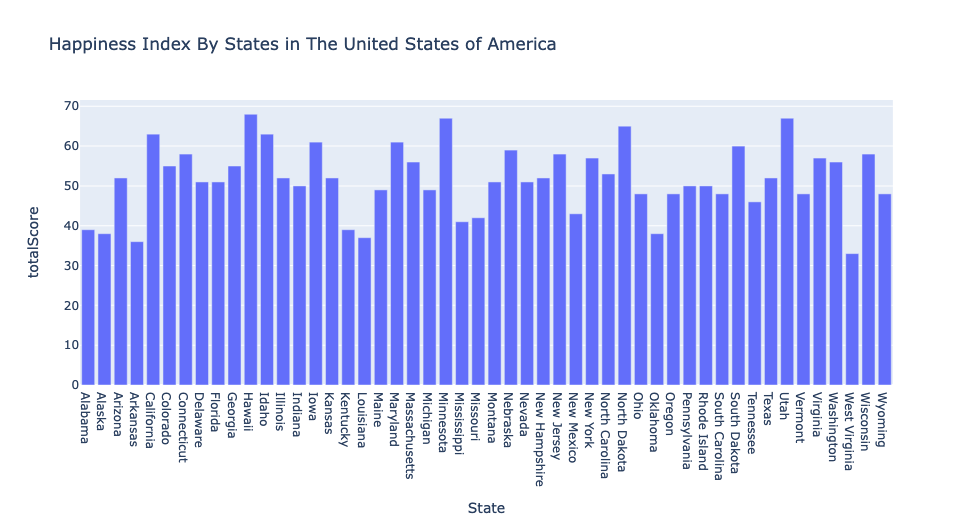

## Analysizing Median Home Values in USA:

As stated before, home-value is based on a multitude of factors such as those explored above. If we take a look at what we have analyzed thus far and the box-plot below we can see that the state of Masachussets, California, Colorado, and Hawaii have a higher median home-value. Furthermore, states such as Alabama, West Virginia, Texas, and Michigan (and others) have lower median home-values. On average, states with a higher median home-value also have higher walk and transit scores (e.g., MA walkscore = 82 transitscore = 72) compared to states with a lower median home-value (e.g., AL walkscore = 21 transitscore = 25). 

Taking a look at other parameters, we can see that homes with a lower median list price also rank lower on the happiness index, and have higher suicide rates as well as higher obesity rates in adult males and females. Although it is important to note that unemployment rates are higher in areas where the median home value is higher (e.g., MA, CA, NY) compared to states that have a lower median list price such as Texas, West Virginia, and Alabama. 

In [13]:
list_prices = pd.read_csv("listprices.csv")
list_prices.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,102001,0,United States,country,NaN,263267.0,271267.0,276300.0,279667.0,279967.0,...,334333.0,331667.0,336667.0,349000.0,364967.0,379933.0,391267.0,397633.0,396000.0,392967.0
1,394913,1,"New York, NY",msa,NY,503000.0,513000.0,521300.0,526300.0,528300.0,...,590000.0,593333.0,604333.0,615667.0,631880.0,641880.0,648546.0,642333.0,634333.0,627667.0
2,753899,2,"Los Angeles, CA",msa,CA,721333.0,735000.0,743333.0,750000.0,749667.0,...,856000.0,866000.0,882623.0,905938.0,926238.0,942948.0,949967.0,949667.0,941333.0,932667.0
3,394463,3,"Chicago, IL",msa,IL,284600.0,294600.0,300600.0,302267.0,301967.0,...,289633.0,284966.0,287967.0,297667.0,309300.0,317967.0,323300.0,323983.0,320649.0,317316.0
4,394514,4,"Dallas, TX",msa,TX,322997.0,328497.0,331797.0,332800.0,329502.0,...,377720.0,381053.0,387632.0,394332.0,405998.0,418300.0,431633.0,438267.0,434967.0,428297.0


In [14]:
# pre-processing
list_prices = list_prices[["RegionName","StateName","2022-09-30"]]
list_prices =list_prices.rename(columns = {"2022-09-30":"ListPrice"})

In [87]:
print(list_prices.isnull().sum())

RegionName    0
StateName     0
ListPrice     0
Metro         0
dtype: int64


In [16]:
list_prices = list_prices.dropna()

In [85]:
print(list_prices.dtypes)

RegionName    object
StateName     object
ListPrice      int64
Metro         object
dtype: object


In [18]:
list_prices["ListPrice"] = list_prices["ListPrice"].astype(int)

In [86]:
print(list_prices.dtypes)

RegionName    object
StateName     object
ListPrice      int64
Metro         object
dtype: object


In [20]:
list_prices['Metro'] = list_prices['RegionName'].str.split(',').str[0]

In [65]:
list_prices = list_prices.sort_values(by=["StateName"],ascending=True)
list_prices.head()

,RegionName,StateName,ListPrice,Metro
134,"Anchorage, AK",AK,395967,Anchorage
779,"Juneau, AK",AK,464933,Juneau
894,"Ketchikan, AK",AK,481167,Ketchikan
402,"Fairbanks, AK",AK,324933,Fairbanks
601,"Ozark, AL",AL,170167,Ozark


In [66]:
homevalue_fig = px.box(list_prices,title = "Median Home Value in USA", x = "StateName",y="ListPrice")

homevalue_fig.show()

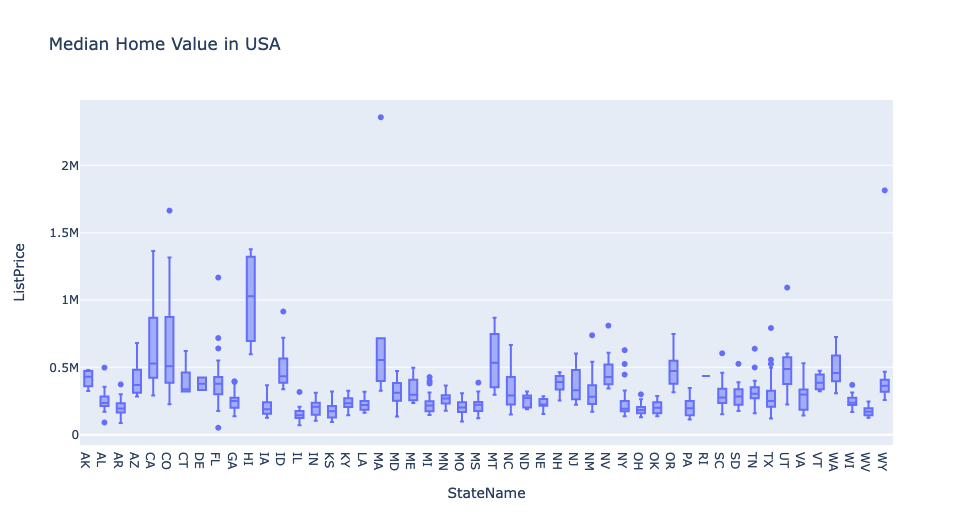

## Correlation Matrices:

Below, I produced correlation matrices between the median list prices of homes and varying parameters to explore how strong the correlation is between the two datasets. From the results we can see that the parameters that were explored above have low correlation scores when comparing its affects on list prices. 

In [67]:
result = pd.concat([happiness_index, list_prices], axis=1).corr()

In [68]:
result.head()

,totalScore,emotAndPhysRank,workEnvironRank,communityAndEnvironRank,ListPrice
totalScore,1.000000,-0.870943,-0.333827,-0.488546,0.330012
emotAndPhysRank,-0.870943,1.000000,0.457365,0.131429,-0.318131
workEnvironRank,-0.333827,0.457365,1.000000,-0.095816,-0.161021
communityAndEnvironRank,-0.488546,0.131429,-0.095816,1.000000,-0.120599
ListPrice,0.330012,-0.318131,-0.161021,-0.120599,1.000000


In [76]:
fig = px.imshow(result,title="Correlation Matrix Between Happiness Index and Median List Prices for Homes Across USA", text_auto=True)
fig.show()

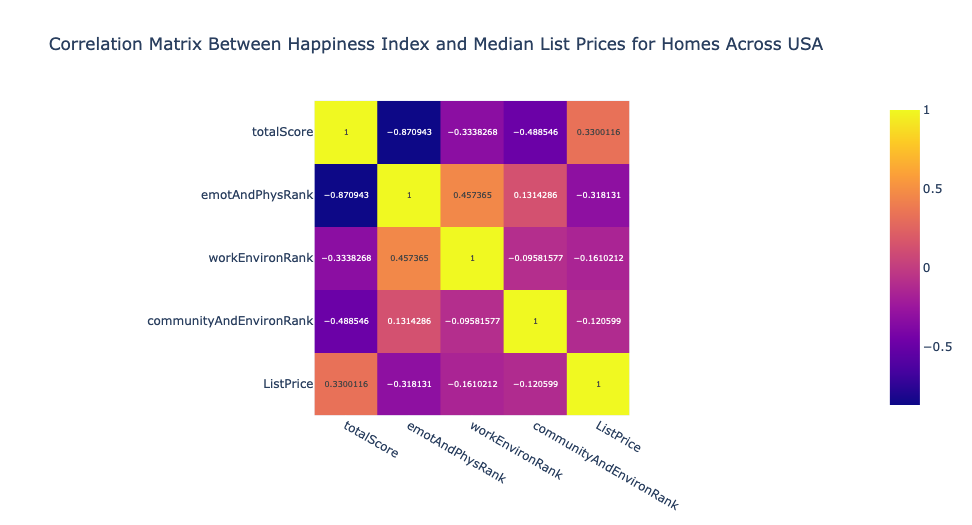

In [80]:
scores_corr = pd.concat([scores_df, list_prices], axis=1).corr()
scores_corr.head()

,WALK_SCORE,TRANSIT_SCORE,BIKE_SCORE,POPULATION,ListPrice
WALK_SCORE,1.000000,0.923167,1.000000,0.321611,0.215341
TRANSIT_SCORE,0.923167,1.000000,0.923167,0.421903,0.229894
BIKE_SCORE,1.000000,0.923167,1.000000,0.321611,0.215341
POPULATION,0.321611,0.421903,0.321611,1.000000,0.309349
ListPrice,0.215341,0.229894,0.215341,0.309349,1.000000


In [75]:
scores_corr_fig = px.imshow(scores_corr,title="Correlation Matrix Between Walk and Transit Scores and Median List Prices for Homes Across USA", text_auto=True)
scores_corr_fig.show()

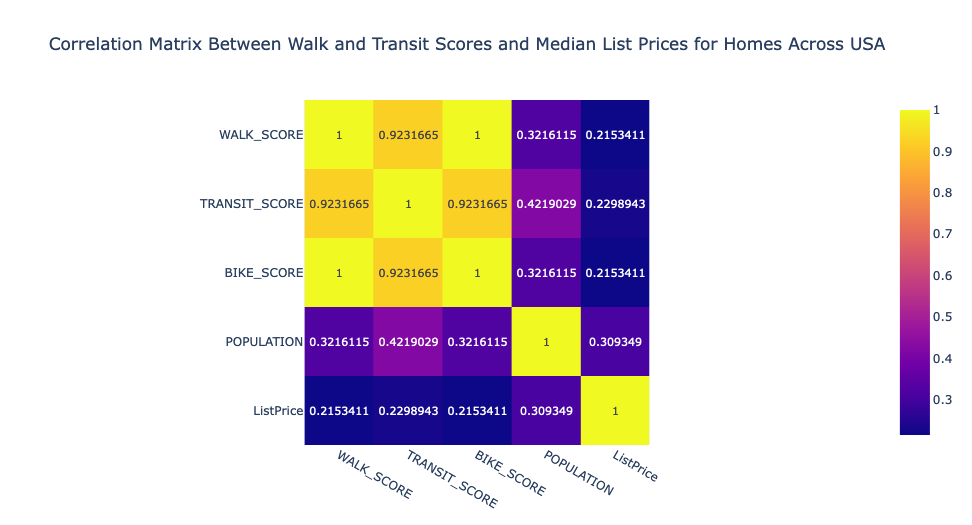

In [79]:
obesity_corr = pd.concat([obesity_rates, list_prices], axis=1).corr()
obesity_corr.head()

,Male_Obesity,Female_Obesity,Male_Physical_Activity,Female_Physical_Activity,ListPrice
Male_Obesity,1.000000,0.772475,-0.734290,-0.722559,-0.037192
Female_Obesity,0.772475,1.000000,-0.743793,-0.805554,-0.000626
Male_Physical_Activity,-0.734290,-0.743793,1.000000,0.877849,0.018409
Female_Physical_Activity,-0.722559,-0.805554,0.877849,1.000000,-0.021370
ListPrice,-0.037192,-0.000626,0.018409,-0.021370,1.000000


In [78]:
obesity_corr_fig = px.imshow(obesity_corr,title="Correlation Matrix Between Obesity Rates and Median List Prices for Homes Across USA", text_auto=True)
obesity_corr_fig.show()

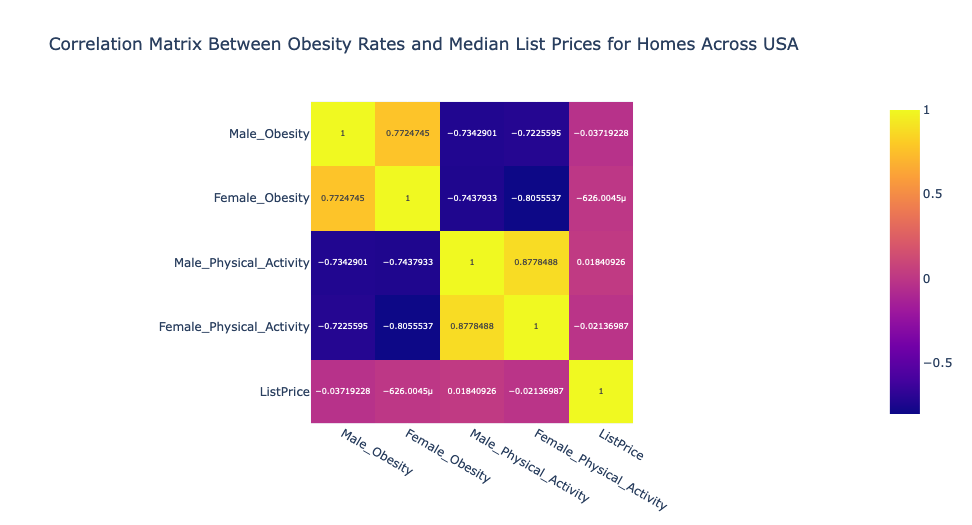

In [81]:
unemployment_corr = pd.concat([unemployment, list_prices], axis=1).corr()
unemployment_corr.head()

,Rate,ListPrice
Rate,1.000000,-0.054432
ListPrice,-0.054432,1.000000


In [82]:
unemployment_corr_fig = px.imshow(unemployment_corr,title="Correlation Matrix Between Unemployment Rates and Median List Prices for Homes Across USA", text_auto=True)
unemployment_corr_fig.show()

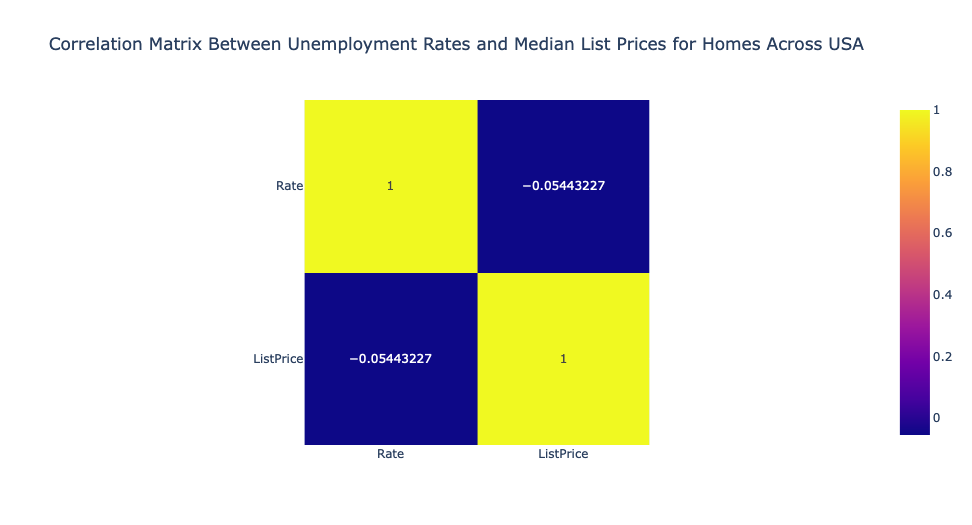

In [83]:
suicide_corr = pd.concat([suiciderates, list_prices], axis=1).corr()
suicide_corr.head()

,YEAR,RATE,ListPrice
YEAR,1.000000,0.269066,0.204265
RATE,0.269066,1.000000,0.019470
ListPrice,0.204265,0.019470,1.000000


## Conclusion:

There are many factors that play significant and or minor roles in the list price of homes. In this analysis I concluded that the parameters that were explored did not play a significant role in affecting the overall median list price of homes. To better improve this study, neighboring home list prices and historic property value should be evaluated as parameters that may produce a strong correlation value. Despite the fact that the analyzed factors do not play a significant role, it is important to highlight that parameters such as walkability, quality of life, and access to public transportation do have a positive correlation when it comes to the median list prices. It is also important to note that working with a larger dataset may help identify the same parameters with different correlation values. In particular, many studies have found that there is a moderately strong negative correlation between unemployment rates and housing prices. In this analysis, we also concluded that unemployment rates and median housing list prices had a negative correlation however the value was low. In future studies, instead of list prices, closing prices should be analyzed. 

Links to Data Sources:

1. [Walk/Transit Score Dataset:](https://www.walkscore.com/cities-and-neighborhoods/)
2. [Obesity Rate Dataset:](https://chronicdata.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7/data)
3. [Unemployment Rate Dataset:](https://www.bls.gov/charts/state-employment-and-unemployment/state-unemployment-rates-animated.html)
4. [Happiness Index Dataset:](https://worldpopulationreview.com/state-rankings/happiest-states)
5. [Median List-Price Dataset:](https://www.zillow.com/research/data/)